## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy import linalg

c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## Please make sure that your code works with loading data from relative path only

i.e. ```pd.read_csv('./data/multi_var_lasso.csv')``` should not throw an error when we run the auto-grading scripts

In [2]:
data_multi = pd.read_csv('./data/multi_var_lasso.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 6)]
X_multi = np.array(data_multi[cols])
Y_multi = np.array(data_multi['y_gt'])

In [3]:
data_multi_class = pd.read_csv('./data/3_class_perceptron.csv')
cols = [f"x_gt_{idx}" for idx in range(1, 3)]
X_multi_class = np.array(data_multi_class[cols])
Y_multi_class = np.array(data_multi_class['y_gt'])

In [4]:
def mse_multi_var(X, Y, w, b):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''

    ## TODO
    y_pred = np.dot(X, w.T) + b
    mse = np.mean(np.square(y_pred - Y))

    ## END TODO

    return mse

In [5]:
def mse_regularized(X, Y, w, b, lamda):
    '''
    Compute mean squared error between predictions and true y values

    Args:
    X - numpy array of shape (n_samples, 1)
    Y - numpy array of shape (n_samples, 1)
    w - a float
    b - a float
    '''
    ## TODO
    
    n_samples = len(Y)
    y_pred = np.dot(X, w.T) + b
    mse = np.mean(np.square(y_pred - Y))  + lamda*np.sum(np.abs(w))/n_samples

    ## END TODO

    return mse

## Plot Graphs

- This function plots the ground truth curve in <font color=green>green</font> and the predicted function in <font color=red>red</font>

In [6]:
def plot_curves(w, b, x, y):
  x_gt = np.linspace(-1, 2, 50)
  y_gt = 1 - 3 * x_gt - 2 * x_gt ** 2 + 2.5 * x_gt ** 3
  # print(x_gt.shape,y_gt.shape)
  if len(w) == 1:
    y_fit = w * x_gt + b
  elif len(w) == 5:
    x_fit = x_gt
    for pow in range(2, 4):
      x_fit = np.vstack([x_fit, np.power(x_gt, pow)])

    x_fit = np.vstack([x_fit, np.power(x_gt, 2)])
    x_fit = np.vstack([x_fit, np.power(x_gt, 1)])
    
    y_fit = np.dot(w, x_fit) + b
  else:
    assert False, 'Pass a valid w'
  plt.plot(x_gt, y_gt, color="green", label='1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3')
  plt.plot(x_gt, y_fit, color='red', label="Fitted Function y = w.Tx + b")
  if len(x.shape) == 1:
    x_plot = np.vstack([x, np.ones(len(x))]).T
    # print (x_plot.shape, y.shape)
  else:
    x_plot = x
  plt.scatter(x_plot[:,0],y)
  plt.legend()
  plt.title("Ground Truth Function")
  plt.show()

In [7]:
def split_data(X, Y, train_ratio=0.6):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    ## TODO
    
    split_val = int(len(Y)*train_ratio)
    rng = np.random.default_rng()
    arr = np.arange(len(Y))
    rng.shuffle(arr)
    X = X[arr]
    Y = Y[arr]
    X_train = X[:split_val]
    Y_train = Y[:split_val]
    X_val = X[split_val:]
    Y_val = Y[split_val:]
    
    ## END TODO

    return X_train, Y_train, X_val, Y_val

# Lasso Regression

Validation loss if inf
Training Loss loss if inf


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app


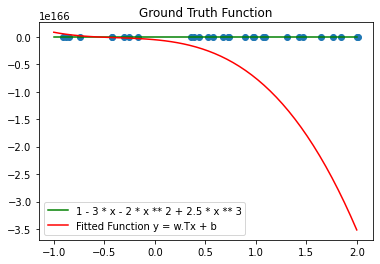

(array([-8.42140974e+164, -1.41075265e+165, -2.49579478e+165,
        -1.41075265e+165, -8.42140974e+164]), -5.410397129803608e+164)

In [8]:
X_train, Y_train, X_val, Y_val = split_data(X_multi, Y_multi, train_ratio=0.6)

def ista(X_train, Y_train, X_val, Y_val, epochs=500, lr=1e-1, lamda = 0.01):
    '''
    Perform multi variable lasso regression using ISTA

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    epochs - number of gradient descent steps
    lr - learnig rate
    lamda - regularization_weight
    '''

    w = np.zeros(X_train.shape[1]) #np.random.randn(X_train.shape[1])
    b = 0
    ## TODO
    
    def soft_threshold(alpha, x):
        if x > alpha:
            return x - alpha
        elif x < -alpha:
            return x + alpha
        else:
            return 0
    
    n = len(Y_train)
    m = X_train.shape[1]
#     print(w.shape, n)
    for i in range(epochs):
        
        y_pred = np.dot(X_train, w) + b        
        dw_ols = 2*lr*(np.dot(X_train.T, (y_pred - Y_train)))/n  
        w_soft = np.zeros(w.shape)
        for j in range(m):
            w_soft[j] = soft_threshold(lr*lamda, w[j])
            
        w = w_soft - dw_ols
        
        
        db = 2*lr*np.sum(y_pred - Y_train)/n        
        b = b - db

    ## END TODO
    
    mse_train = mse_regularized(X_train, Y_train, w, b, lamda)
    mse_val = mse_regularized(X_val, Y_val, w, b, lamda)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
#     print(w.shape,b,X_train.shape,Y_train.shape)
    plot_curves(list(w), b, X_train, Y_train)
    return w, b

ista(X_train, Y_train, X_val, Y_val)

2
Validation loss if 2.03100253370775
Training Loss loss if 2.4211069853080915


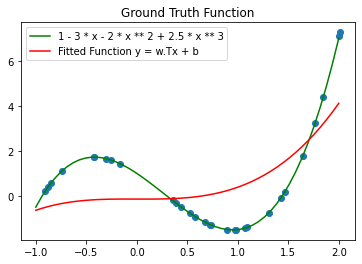

0.5
Validation loss if 0.9475203533376746
Training Loss loss if 0.8135126429578985


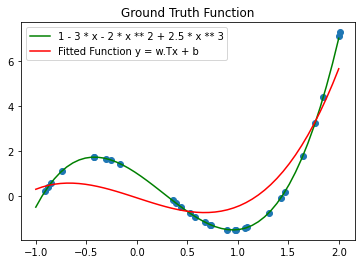

0.1
Validation loss if 0.1602852216581317
Training Loss loss if 0.1232492756031611


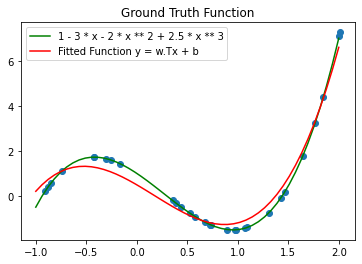

0.05
Validation loss if 0.05632518515262612
Training Loss loss if 0.04212287937193723


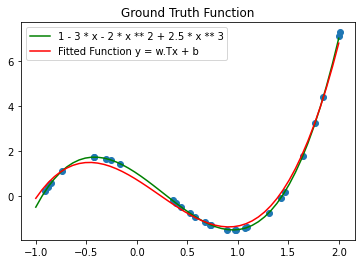

0.025
Validation loss if 0.022791163448490803
Training Loss loss if 0.01660322607911091


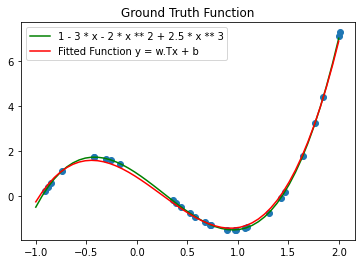

In [9]:
ll = [2, 0.5,0.1, 0.05, 0.025]
for l in ll:
    print(l)
    ista(X_train, Y_train, X_val, Y_val, epochs=2000, lamda=l, lr=0.01)

# Ridge Regression

Validation loss if 0.03264273532612727
Training Loss loss if 0.024097261936913052


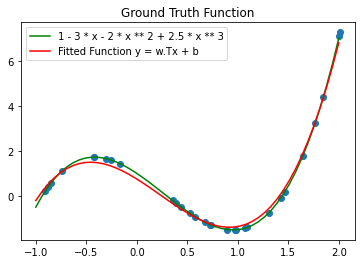

(array([-1.39969604, -0.76599741,  2.22160661, -0.76599741, -1.39969604]),
 0.7488488395306598)

In [10]:
def multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=0.5):

    '''
    Perform L2 regularized multi variable least squares regression using 
    closed form update rules

    Args:
    X_train - numpy array of shape (n_samples_train, 5)
    Y_train - numpy array of shape (n_samples_train, 1)
    X_val - numpy array of shape (n_samples_val, 5)
    Y_val - numpy array of shape (n_samples_val, 1)
    lambda - regularization weight
    '''

    w = np.zeros(X_train.shape[1])
    b = 0

    ## TODO     #use closed-form solution from previous assignment
    
    n = len(Y_train)
    w = np.array(w)
    X = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
    w_b = np.dot(np.linalg.inv(np.dot(X.T, X) + lamda*np.identity(X.shape[1])), np.dot(X.T, Y_train)) 
    
    w = w_b[:-1]
    b = w_b[-1]   

    ## END TODO

    mse_train = mse_multi_var(X_train, Y_train, w, b)
    mse_val = mse_multi_var(X_val, Y_val, w, b)
    print(f'Validation loss if {mse_val}')
    print(f'Training Loss loss if {mse_train}')
    plot_curves(list(w), b, X_train, Y_train)
    
    return w, b

multivar_reg_closedform(X_train, Y_train, X_val, Y_val)

Validation loss if 0.9479131060847731
Training Loss loss if 0.8138503855252666


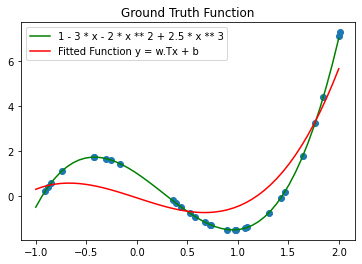

w =  -0.731,  -0.000,  1.083,  -0.000,  -0.731,  -0.086,  

Validation loss if 0.03264273532612727
Training Loss loss if 0.024097261936913052


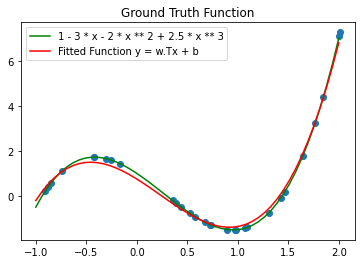

w =  -1.400,  -0.766,  2.222,  -0.766,  -1.400,  0.749,  

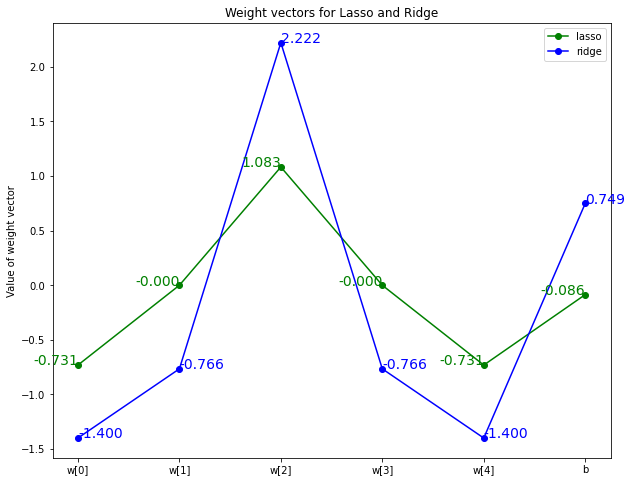

In [41]:
w1, b1 = ista(X_train, Y_train, X_val, Y_val, lamda=0.5, epochs=1000, lr=0.01)
w1 = np.concatenate((w1, [b1]))
print('w = ', end=' ')
for wi in w1:
    print("{:.3f}, ".format(wi), end=' ')
print('\n')
w2, b2 = multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=0.5)
w2 = np.concatenate((w2, [b2]))
print('w = ', end=' ')
for wi in w2:
    print("{:.3f}, ".format(wi), end=' ')


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
lab = ['w[0]', 'w[1]', 'w[2]', 'w[3]', 'w[4]', 'b']
plt.plot(lab, w1, marker='o', color='green')
plt.plot(lab, w2, marker='o', color='blue')
for i in range(len(w1)):
    ax.annotate("{:.3f}".format(w1[i]), xy=(i, w1[i]), ha='right', fontsize=14, color='green')
    ax.annotate("{:.3f}".format(w2[i]), xy=(i, w2[i]), ha='left', fontsize=14, color='blue')
plt.legend(['lasso', 'ridge'])
plt.ylabel('Value of weight vector')
plt.title('Weight vectors for Lasso and Ridge')
plt.show()

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


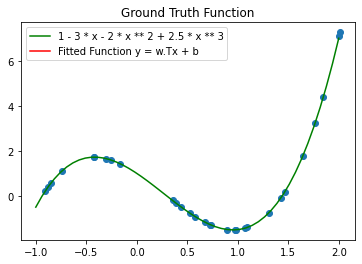

Validation loss if 1.8645717071001594e-09
Training Loss loss if 1.3599697374752327e-09


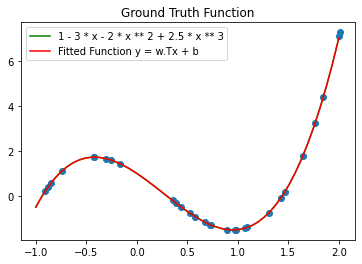

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


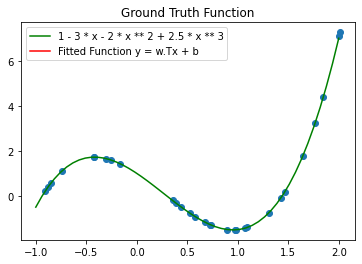

Validation loss if 1.9246143294546505e-05
Training Loss loss if 1.40408582899549e-05


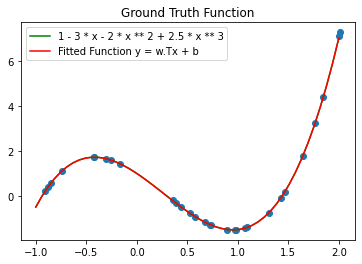

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


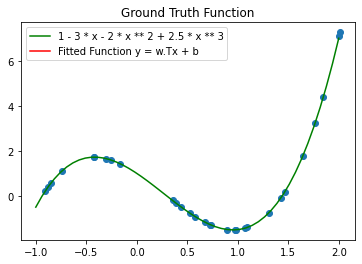

Validation loss if 7.56335170559901e-05
Training Loss loss if 5.519048412190686e-05


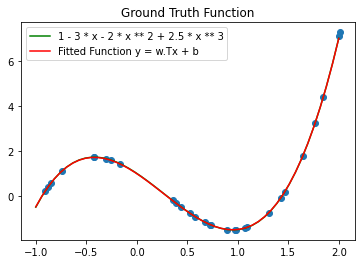

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


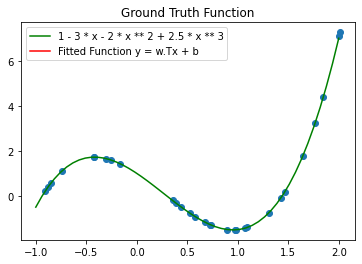

Validation loss if 0.00016829162114852418
Training Loss loss if 0.0001228323169966331


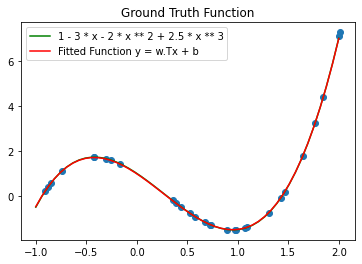

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


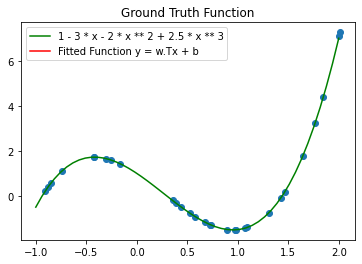

Validation loss if 0.0002963688959912868
Training Loss loss if 0.0002163631467466309


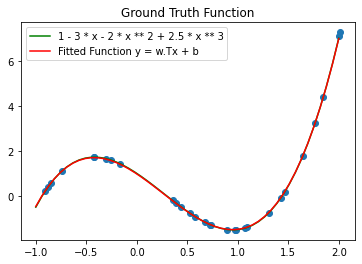

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


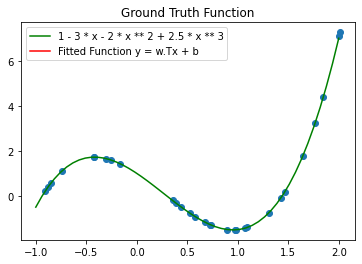

Validation loss if 0.00045903403533534065
Training Loss loss if 0.00033519408273943296


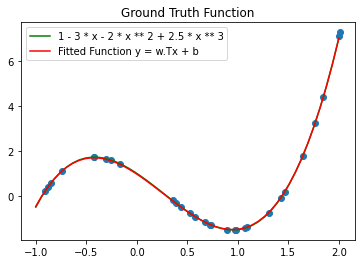

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


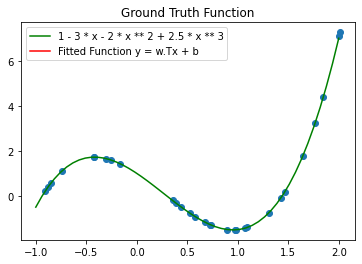

Validation loss if 0.0006554754510392527
Training Loss loss if 0.0004787501748151761


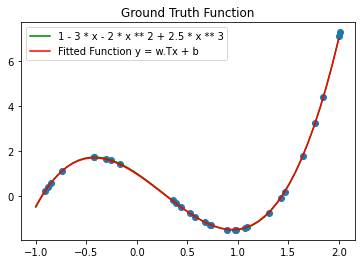

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


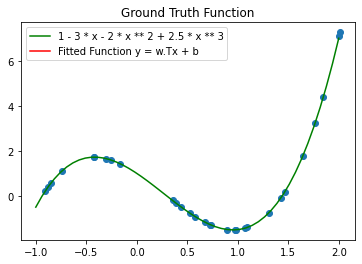

Validation loss if 0.0008849007535963411
Training Loss loss if 0.0006464700454351018


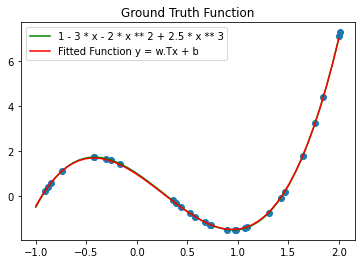

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


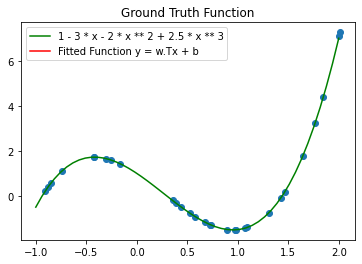

Validation loss if 0.0011465362480349408
Training Loss loss if 0.0008378055327262394


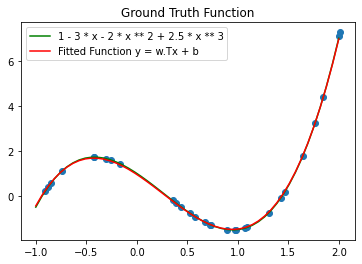

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


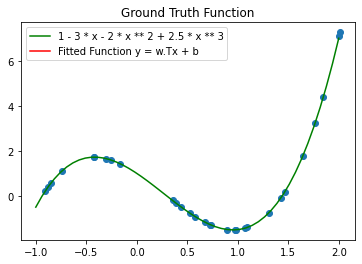

Validation loss if 0.0014396264447272883
Training Loss loss if 0.0010522213440753443


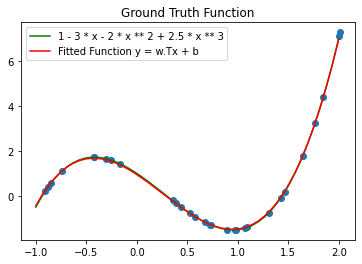

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


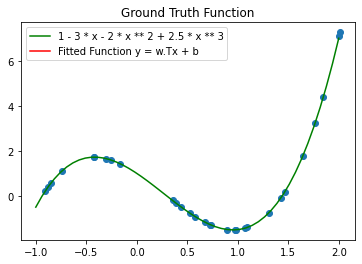

Validation loss if 0.001763433584466036
Training Loss loss if 0.0012891947198733075


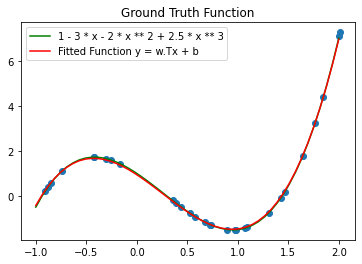

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


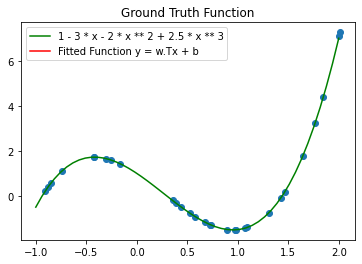

Validation loss if 0.0021172371774555118
Training Loss loss if 0.0015482151071118525


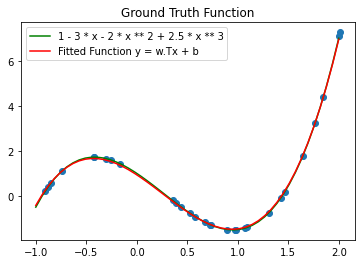

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


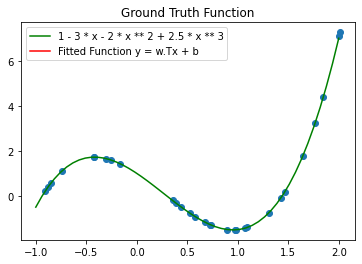

Validation loss if 0.0025003335557586886
Training Loss loss if 0.0018287838425197073


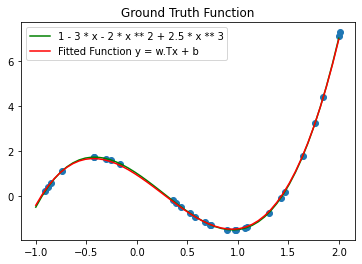

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


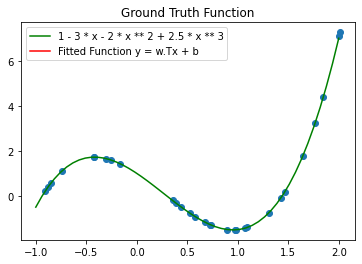

Validation loss if 0.002912035438710597
Training Loss loss if 0.0021304138448988313


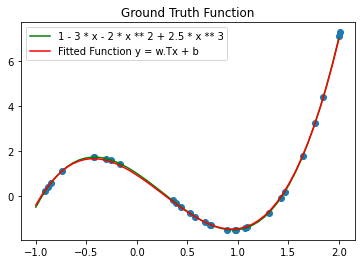

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


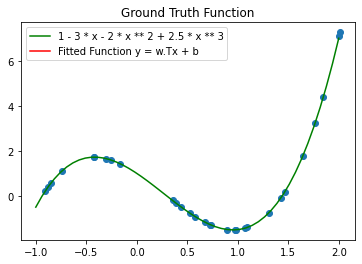

Validation loss if 0.0033516715109128915
Training Loss loss if 0.0024526293163796404


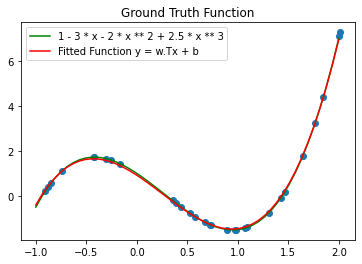

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


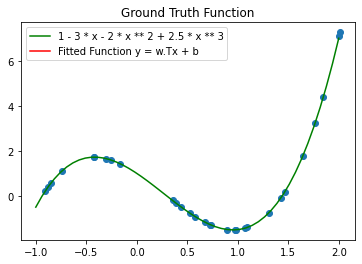

Validation loss if 0.0038185860123976295
Training Loss loss if 0.0027949654523073916


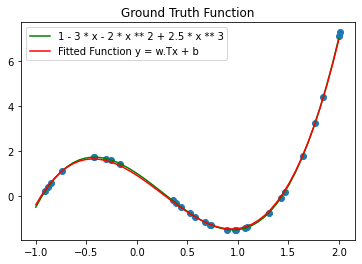

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


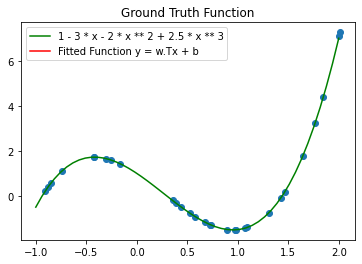

Validation loss if 0.004312138340560179
Training Loss loss if 0.0031569681594718463


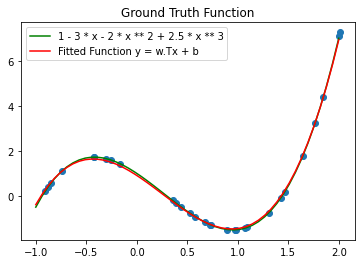

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


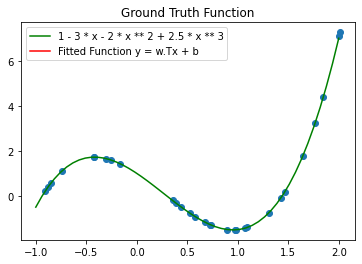

Validation loss if 0.004831702663519252
Training Loss loss if 0.0035381937824323184


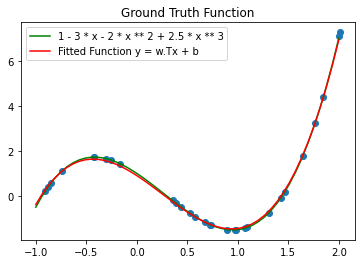

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


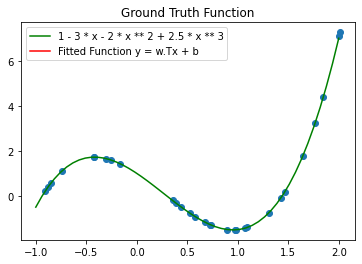

Validation loss if 0.005376667544440564
Training Loss loss if 0.003938208837636745


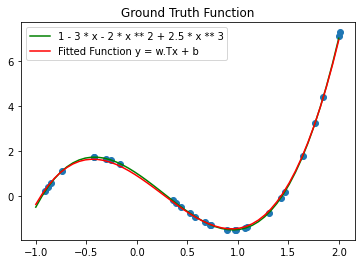

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


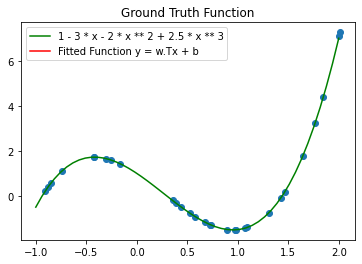

Validation loss if 0.0059464355766764634
Training Loss loss if 0.004356589755170392


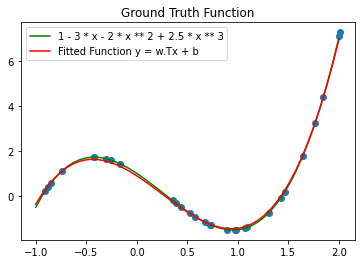

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


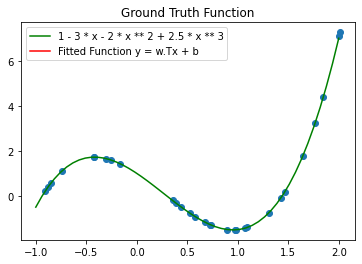

Validation loss if 0.006540423029098336
Training Loss loss if 0.004792922627772086


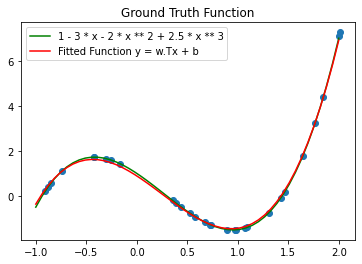

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


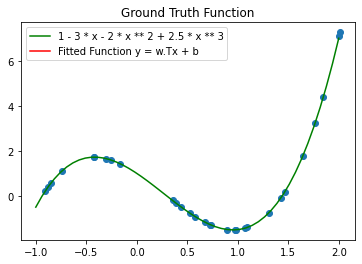

Validation loss if 0.007158059501565664
Training Loss loss if 0.005246802967008357


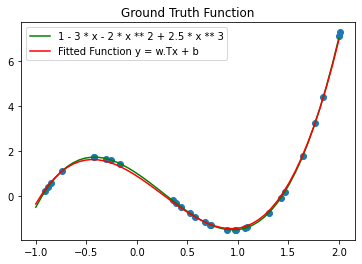

Validation loss if nan
Training Loss loss if nan


c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


KeyboardInterrupt: 

In [12]:


all_lambda = np.linspace(0.0001, 1, 100)
lassow = []
ridgew = []

lasso1 = []
ridge1 = []
for i, l in enumerate(all_lambda):
    w1, b1 = ista(X_train, Y_train, X_val, Y_val, lamda=l, epochs=1200)
    w2, b2 = multivar_reg_closedform(X_train, Y_train, X_val, Y_val, lamda=l)

    w1 = np.concatenate((w1, [b1]))
    w2 = np.concatenate((w2, [b2]))
    
    lassow.append(np.linalg.norm(w1))
    ridgew.append(np.linalg.norm(w2))
    
    lasso1.append(np.linalg.norm(w1,ord=1))
    ridge1.append(np.linalg.norm(w2,ord=1))

    

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.plot(lassow, marker='', color='green', mew = 0.1)
plt.plot(ridgew, marker='', color='blue', mew=0.1)
plt.ylabel('2-Norm of weight $||w||_2$')
plt.xlabel('Lambda $\lambda$')
plt.title('2-Norm of weight vector $||w||_2$ VS lambda $\lambda$')
plt.legend(['lasso', 'ridge'])
plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.plot(lasso1, marker='', color='green', mew = 0.1)
plt.plot(ridge1, marker='', color='blue', mew=0.1)
plt.ylabel('1-Norm of weight $||w||_1$')
plt.xlabel('Lambda $\lambda$')
plt.title('1-Norm of weight vector $||w||_1$ VS lambda $\lambda$')
plt.legend(['lasso', 'ridge'])
plt.show()

# Bias-Variance Tradeoff

In [ ]:
#
def ridge(X_train, Y_train, X_test,epochs=350, lr=0.005, lamda = 1):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 

    ## TODO
    
    for i in range(epochs):
        
        y_pred = w*X_train + b        
        dw = 2*(np.dot(X_train.T, (y_pred - Y_train)))/n + 2*lamda*w
        db = 2*np.sum(y_pred - Y_train)/n
        w -= lr*dw
        b -= lr*db

    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

def lasso(X_train, Y_train, X_test,epochs=200, lr=0.01, lamda = 1):
    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ##TODO
    
    def soft_threshold(alpha, x):
        if x > alpha:
            return x - alpha
        elif x < -alpha:
            return x + alpha
        else:
            return 0
    
    for i in range(epochs):
        
        y_pred = w*X_train + b        
        dw_ols = 2*lr*(np.dot(X_train.T, (y_pred - Y_train)))/n  
        w_soft = soft_threshold(lr*lamda, w)
            
        w = w_soft - dw_ols
        
        
        db = 2*lr*np.sum(y_pred - Y_train)/n        
        b = b - db

    ##END TODO

    Y_pred = w*X_test+b
#     print(lamda, Y_pred)
    return Y_pred

def ols(X_train, Y_train, X_test,epochs=500, lr=0.005):

    w = 0.6
    b = 2
    n = float(len(X_train)) # Number of elements in X

    # Performing Gradient Descent 
    ## TODO
    
#     print(X_train.shape)
    
    for i in range(epochs):
        
        y_pred = w*X_train + b
        dw = 2*(np.dot((y_pred - Y_train).T, X_train))/n
        db = 2*np.sum(y_pred - Y_train)/n
        w -= lr*dw
        b -= lr*db

    ### END TODO

    Y_pred = w*X_test+b
    return Y_pred

In [ ]:
# We fit multiple lines onto our linear model defined by y = c + mx + error.
num_lines = 10
#size of Dataset, len(Dataset) for 1 line
n = 500
#weights (slope/intercept)
c = 3
m = 5

In [ ]:
def gen_data():
    '''
    We sample n, X from uniform distribution and error from zero mean normal distribtion, we find Y using mx+c+e
    We do the above for num_lines number of time, to fit different lines for each models(lasso, ols, ridge), doing so will
    be helpfull in calculating Expected value of learned esitmator of all n*num_lines dataset

    DO NOT CHANGE this function.
    '''

    w0 = c
    w1 = m
    data = np.zeros(shape=(num_lines,n,2))
    for i in range(num_lines):
        x = np.random.uniform(-2, 2, size=(n, 1))
        e = np.random.normal(0, 8, size=(n, 1))
        y = w0 + w1 * x + e
        x_y = np.concatenate((x, y), axis=1)
        data[i,:,:] = x_y
    return np.array(data)

In [ ]:
def gen_bais_variance(Y_preds, Y_true):
    ## TODO
    
    mu_pred = np.mean(Y_preds, axis = 0)
    variance = np.mean(np.square(Y_preds - mu_pred), axis=0)
    bias = mu_pred - np.repeat(Y_true, 3)

    ## END TODO
    return bias, variance

In [ ]:
def make_prediction(data, X_test, lambda_=0.5):

  y_hat = np.zeros(shape=(num_lines, 3))#store prediction of all model

  for i in range(num_lines):
      X = data[i, :, 0].reshape(n ,1)
      y = data[i, :, 1].reshape(n, 1)

      y_hat[i, 0] = ols(X, y, X_test)

      y_hat[i, 1] = ridge(X, y, X_test, lamda = lambda_)

      y_hat[i, 2] = lasso(X, y, X_test, lamda = lambda_)

  return y_hat

In [ ]:
def plot_figure(l,b,v):

  plt.plot(l, b[:, 0], label="OLS")
  plt.plot(l, b[:, 1], label="Ridge")
  plt.plot(l, b[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Bias")
  plt.title("Bias vs Lambda")
  plt.legend(loc="upper left")
  plt.show()

  plt.plot(l, v[:, 0], label="OLS")
  plt.plot(l, v[:, 1], label="Ridge")
  plt.plot(l, v[:, 2], label="Lasso")
  plt.xlabel("Regularization coefficient")
  plt.ylabel("Variance")
  plt.title("Variance vs Lambda")
  plt.legend(loc="lower left")
  plt.show()



In [ ]:
def driver():
  all_lambda = np.linspace(0.0001, 1, 100)
  all_bias = np.zeros(shape=(len(all_lambda), 3))
  all_variance = np.zeros(shape=(len(all_lambda), 3))
  dataset = gen_data()
  X_test = np.array([4]).reshape((1,1))
  for i, l in enumerate(all_lambda):
      Y_hat = make_prediction(dataset, X_test, lambda_=l)
      ##TODO #calculate true mean Y_true

      Y_true = m*X_test + c

      ##END TODO
      all_bias[i, :], all_variance[i, :] = gen_bais_variance(Y_hat, Y_true) 
  plt.plot(all_variance[:, 0], abs(all_bias[:, 0]), label="OLS")
  plt.xlabel("Variance")
  plt.ylabel("|Bias|")
  plt.title("Magnitude of Bias vs Variance")
  plt.show()
  
  plt.plot(all_variance[:, 1], abs(all_bias[:, 1]), label="Ridge")
  plt.xlabel("Variance")
  plt.ylabel("|Bias|")
  plt.title("Magnitude of Bias vs Variance for Ridge")
  plt.show()

  plt.plot(all_variance[:, 2], abs(all_bias[:, 2]), label="Lasso")
  plt.xlabel("Variance")
  plt.ylabel("|Bias|")
  plt.title("Magnitude of Bias vs Variance for Lasso")
  plt.show()
  plot_figure(all_lambda, all_bias, all_variance)

driver()

# Perceptron

In [ ]:
X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass = split_data(X_multi_class, Y_multi_class, train_ratio=0.6)
def perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass,n_class=3, epochs=30):
  W=np.zeros((n_class, len(X_train_multiclass[0]) ))
  ## TODO
    
    
  for j in range(epochs):
      for i in range(len(Y_train_multiclass)):
        y_pred=np.argmax([np.dot(W[0],X_train_multiclass[i]),np.dot(W[1],X_train_multiclass[i]),
                          np.dot(W[2],X_train_multiclass[i])])
        if y_pred != Y_train_multiclass[i]:
            W[y_pred] -= X_train_multiclass[i]
            W[Y_train_multiclass[i]] += X_train_multiclass[i]
  

  ##END TODO

  Y_pred=list()
  for i in range(len(Y_val_multiclass)):
      y_pred=np.argmax([np.dot(W[0],X_val_multiclass[i]),np.dot(W[1],X_val_multiclass[i]),np.dot(W[2],X_val_multiclass[i])])
      Y_pred.append(y_pred)

  from sklearn.metrics import classification_report
  target_names = ['class 0', 'class 1', 'class 2']
  print(classification_report(Y_val_multiclass, Y_pred, target_names=target_names))
  return W

perceptron_algo(X_train_multiclass, Y_train_multiclass, X_val_multiclass, Y_val_multiclass)
